In [1]:
# Basic NN for TSURF-HW
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Analysis when Autumn sst is the target

In [2]:
# Read SST field
tos_data = xr.open_dataset('/work/uo1075/u301680/all_member/detrend/all_detrend_ocean.nc')
#tos_data = xr.open_dataset('/work/uo1075/u301680/all_member/ocean/all_ocean.nc') # trend 
#tos_data = xr.open_dataset('/work/uo1075/u301680/all_member/ocean/member_2_tos_regrid.nc') # trend member 10

In [3]:
# Extract North Atlantic SST
#tos_north_atlantic = tos_data.sel(lat=slice(0, 70), lon=slice(265, 355))
tos_north_atlantic = tos_data.sel(lat=slice(0, 80), lon=slice(265, 360))

# Calculate seasonal (quarterly) means with seasons starting in December (DJF)
tos_seasonal = tos_north_atlantic['tos'].resample(time="QS-DEC").mean()

# Select autumn seasons (September as the starting month of autumn)
tos_autumn = tos_seasonal.sel(time=tos_seasonal.time.dt.month==9)
#tos_autumn = tos_seasonal.sel(time=(tos_seasonal.time.dt.month.isin([9, 10, 11])))

# # Select data from 1850 to 2013
tos_autumn = tos_autumn.sel(time=slice("1850-09-01T00:00:00.000000000", "2013-09-01T00:00:00.000000000"))

### Plot above mean sst, below mean sst

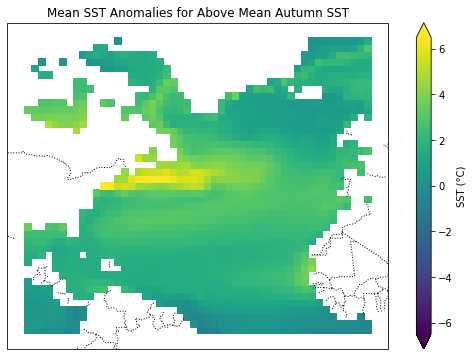

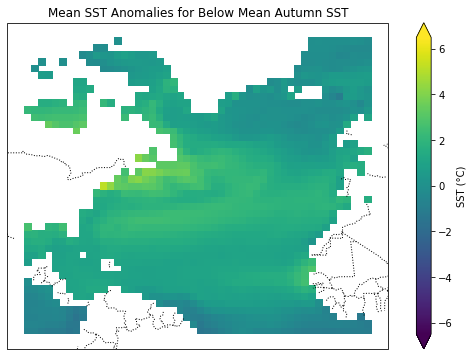

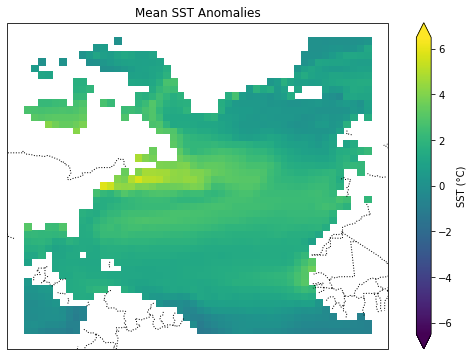

In [4]:
# Store the autumn data into hw_exceed variable
hw_exceed = tos_autumn

# Calculate the mean SST over both the member and time dimensions (members + years)
mean_tos_autumn = hw_exceed.mean(dim=['record', 'time'], skipna=True)

# Step 1: Calculate the overall mean of hw_exceed
mean_sst = hw_exceed.mean(dim='time')

# Step 2: Create masks for above and below the mean
above_mean_mask = hw_exceed > mean_sst
below_mean_mask = hw_exceed < mean_sst

# Step 3: Subset data based on masks
above_mean_sst = hw_exceed.where(above_mean_mask, drop=True)
below_mean_sst = hw_exceed.where(below_mean_mask, drop=True)

# Step 4: Calculate the mean for each subset
mean_above_mean_sst = above_mean_sst.mean(dim=['record', 'time'], skipna=True)
mean_below_mean_sst = below_mean_sst.mean(dim=['record', 'time'], skipna=True)

# Step 5: Plotting

# Define a plotting function for easier reuse
def plot_sst(data, title):
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    data.plot(ax=ax, 
              transform=ccrs.PlateCarree(),
              cmap=plt.cm.get_cmap('viridis'), 
              cbar_kwargs={'label': 'SST (°C)', 
                           'extend': 'both'}, 
              vmin=-6.5, vmax=6.5)
    
    # Add coastlines and gridlines
    #ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(title)
    plt.show()

# Plot mean SST 
#plot_sst(mean_tos_autumn, "Mean SST for Autumn")

# Plot mean SST for above mean
plot_sst(mean_above_mean_sst, 'Mean SST Anomalies for Above Mean Autumn SST')

# Plot mean SST for below mean
plot_sst(mean_below_mean_sst, 'Mean SST Anomalies for Below Mean Autumn SST')

# Plot mean SST 
plot_sst(mean_tos_autumn, 'Mean SST Anomalies')

### Plot the distribution

In [5]:
def plot_histogram(data, title, bins=30):
    plt.figure(figsize=(8, 6))
    plt.hist(data.values.flatten(), bins=bins, color='blue', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('SST (°C)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

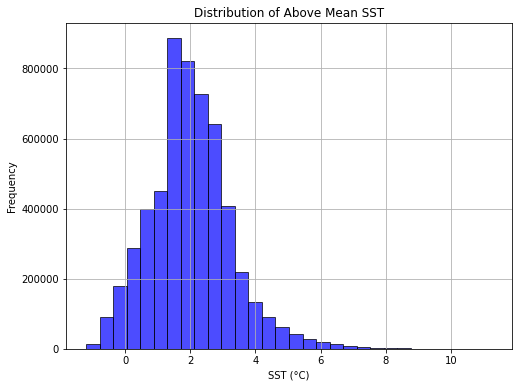

In [6]:
# Plot histogram for the above mean SST
plot_histogram(above_mean_sst, 'Distribution of Above Mean SST')

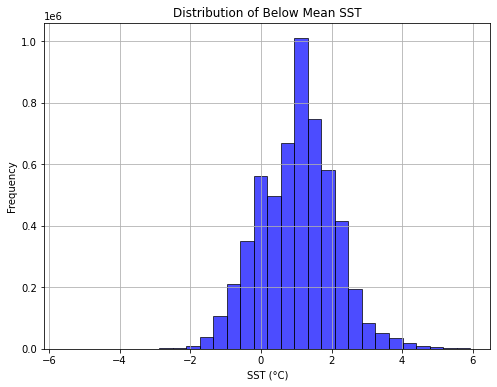

In [7]:
# Plot histogram for the below mean SST
plot_histogram(below_mean_sst, 'Distribution of Below Mean SST')